In [1]:
# Data Preprocessing 
import pandas as pd

# defining column names 
col_names = ['Sen', 'Id', 'Metadata', 'Query', 'Name', 'Tweet']
df = pd.read_csv('D:/Masters/Sem 3/Deep learning/data/Tweets dataset.csv', encoding='latin1', names=col_names, header=0)
df.head()

,Sen,Id,Metadata,Query,Name,Tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [2]:
df.columns

Index(['Sen', 'Id', 'Metadata', 'Query', 'Name', 'Tweet'], dtype='object')

In [3]:
df['Sen'].value_counts()

Sen
4    800000
0    799999
Name: count, dtype: int64

In [4]:
df['Tweet'][df['Sen']==4]

799999          I LOVE @Health4UandPets u guys r the best!! 
800000     im meeting up with one of my besties tonight! ...
800001     @DaRealSunisaKim Thanks for the Twitter add, S...
800002     Being sick can be really cheap when it hurts t...
800003       @LovesBrooklyn2 he has that effect on everyone 
                                 ...                        
1599994    Just woke up. Having no school is the best fee...
1599995    TheWDB.com - Very cool to hear old Walt interv...
1599996    Are you ready for your MoJo Makeover? Ask me f...
1599997    Happy 38th Birthday to my boo of alll time!!! ...
1599998    happy #charitytuesday @theNSPCC @SparksCharity...
Name: Tweet, Length: 800000, dtype: object

In [5]:
# Converting lables 
df['Lable'] = df['Sen'].map({0: 0, 4: 1})
df.head()

,Sen,Id,Metadata,Query,Name,Tweet,Lable
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,0
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,0
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,0
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",0
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,0


In [6]:
df['Lable'].value_counts()

Lable
1    800000
0    799999
Name: count, dtype: int64

In [7]:
# Only getting tweets and lable for the model
new_df = df[['Tweet', 'Lable']]
new_df.head()

,Tweet,Lable
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0


In [8]:
# Tokenization
import nltk
nltk.download('punkt_tab') # for word tokens 

# function to create word tokens
def tokens(text):
    token = nltk.word_tokenize(text)
    return token

new_df['Tokens'] = new_df['Tweet'].apply(tokens)
new_df.head()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\cappr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
C:\Users\cappr\AppData\Local\Temp\ipykernel_9032\1321295183.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Tokens'] = new_df['Tweet'].apply(tokens)


,Tweet,Lable,Tokens
0,is upset that he can't update his Facebook by ...,0,"[is, upset, that, he, ca, n't, update, his, Fa..."
1,@Kenichan I dived many times for the ball. Man...,0,"[@, Kenichan, I, dived, many, times, for, the,..."
2,my whole body feels itchy and like its on fire,0,"[my, whole, body, feels, itchy, and, like, its..."
3,"@nationwideclass no, it's not behaving at all....",0,"[@, nationwideclass, no, ,, it, 's, not, behav..."
4,@Kwesidei not the whole crew,0,"[@, Kwesidei, not, the, whole, crew]"


In [9]:
# Top word counts 
from collections import Counter

all_words = [] # list to store all the words
# loop to get each words into a list
for words in new_df['Tokens']:
    all_words.extend(words)

word_counts = Counter(all_words) # counting the words
print(word_counts.most_common(5)) # displaying top 5 words


[('!', 917950), ('.', 804771), ('@', 798681), ('I', 652879), ('to', 557548)]


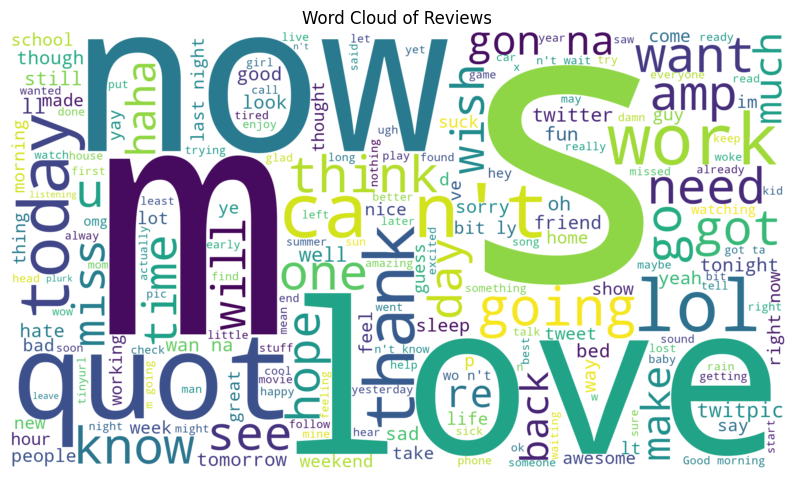

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all words into a single string
text_string = ' '.join(all_words)

# word cloud
wordcloud = WordCloud(width=1920, height=1080, background_color='white').generate(text_string)

# Displaying the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews")
plt.show()


In [11]:
# cleaning the text

import re

# cleaning function
def clean_text(text):
    # Convert to string and handle NaN
    text = str(text) if pd.notnull(text) else ''
    # Remove URLs, mentions, hashtags, and special characters
    text = re.sub(r'http\S+|@\w+|#\w+|[^A-Za-z0-9\s]', '', text)
    # Remove extra whitespace and convert to single spaces, data had many wide spaces so i had to convert it to one space then it will be removed in tokenization 
    text = re.sub(r'\s+', ' ', text).strip()
    return text

new_df['Cleaned_tweet'] = new_df['Tweet'].apply(clean_text)
new_df.head()

C:\Users\cappr\AppData\Local\Temp\ipykernel_9032\2029149030.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cleaned_tweet'] = new_df['Tweet'].apply(clean_text)


,Tweet,Lable,Tokens,Cleaned_tweet
0,is upset that he can't update his Facebook by ...,0,"[is, upset, that, he, ca, n't, update, his, Fa...",is upset that he cant update his Facebook by t...
1,@Kenichan I dived many times for the ball. Man...,0,"[@, Kenichan, I, dived, many, times, for, the,...",I dived many times for the ball Managed to sav...
2,my whole body feels itchy and like its on fire,0,"[my, whole, body, feels, itchy, and, like, its...",my whole body feels itchy and like its on fire
3,"@nationwideclass no, it's not behaving at all....",0,"[@, nationwideclass, no, ,, it, 's, not, behav...",no its not behaving at all im mad why am i her...
4,@Kwesidei not the whole crew,0,"[@, Kwesidei, not, the, whole, crew]",not the whole crew


In [12]:
# droping the old tokens 
new_df.drop('Tokens', axis= 1, inplace=True)
new_df.head()

C:\Users\cappr\AppData\Local\Temp\ipykernel_9032\1403102203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop('Tokens', axis= 1, inplace=True)


,Tweet,Lable,Cleaned_tweet
0,is upset that he can't update his Facebook by ...,0,is upset that he cant update his Facebook by t...
1,@Kenichan I dived many times for the ball. Man...,0,I dived many times for the ball Managed to sav...
2,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire
3,"@nationwideclass no, it's not behaving at all....",0,no its not behaving at all im mad why am i her...
4,@Kwesidei not the whole crew,0,not the whole crew


In [13]:
import spacy

# using spacy model'en_core_web_sm' 
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])  # Disable unused components for speed

In [14]:
# getting to know spacy by toknization the first tweet
text = new_df['Cleaned_tweet'][0]
doc = nlp(text)

for token in doc:
    print(token.text)

is
upset
that
he
ca
nt
update
his
Facebook
by
texting
it
and
might
cry
as
a
result
School
today
also
Blah


In [15]:
# Tokenize 
def tokenize(texts):
    return [[token.text.lower() for token in doc if not token.is_punct and not token.is_stop]
            for doc in nlp.pipe(texts)
           ]
# apply tokenization
new_df['Tokens'] = tokenize(new_df['Cleaned_tweet'])
new_df.head()

C:\Users\cappr\AppData\Local\Temp\ipykernel_9032\2983993589.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Tokens'] = tokenize(new_df['Cleaned_tweet'])


,Tweet,Lable,Cleaned_tweet,Tokens
0,is upset that he can't update his Facebook by ...,0,is upset that he cant update his Facebook by t...,"[upset, nt, update, facebook, texting, cry, re..."
1,@Kenichan I dived many times for the ball. Man...,0,I dived many times for the ball Managed to sav...,"[dived, times, ball, managed, save, 50, rest, ..."
2,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire,"[body, feels, itchy, like, fire]"
3,"@nationwideclass no, it's not behaving at all....",0,no its not behaving at all im mad why am i her...,"[behaving, m, mad, nt]"
4,@Kwesidei not the whole crew,0,not the whole crew,[crew]


In [16]:
# agian top word cloud after cleaning the data 
all_words = [] # list to store all the words
# loop to get each words into a list
for words in new_df['Tokens']:
    all_words.extend(words)

word_counts = Counter(all_words) # counting the words
print(word_counts.most_common(5)) # displaying top 5 words

[('nt', 232251), ('m', 179415), ('good', 89403), ('day', 82928), ('like', 77749)]


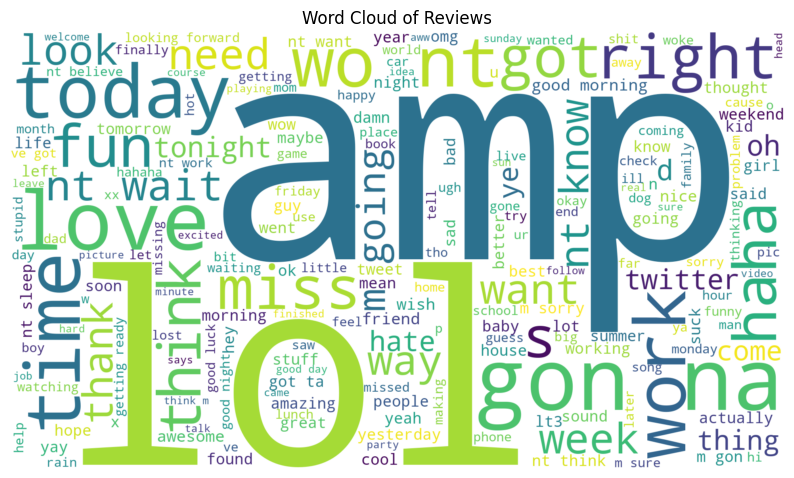

In [17]:
# Combine all words into a single string
text_string = ' '.join(all_words)

# word cloud
wordcloud = WordCloud(width=1920, height=1080, background_color='white').generate(text_string)

# Displaying the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews")
plt.show()


In [18]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# using tokenizer to get the vocabulary on my tweets and converting them to integer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(new_df['Tokens'])  
sequences = tokenizer.texts_to_sequences(new_df['Tokens'])  

In [19]:
# Vocabulary size and word-to-index mapping
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1  # +1 for padding token
print(f"Vocabulary size: {vocab_size}")

Vocabulary size: 434960


In [20]:
# using glove 6B 100d model for embedding
glove_file = 'D:/Masters/Sem 3/Deep learning/glove.6B/glove.6B.100d.txt'  
embedding_dim = 100  # Using 100-dimensional GloVe vectors

In [21]:
# Create a dictionary to store GloVe embeddings
"""
The glove flie contains embeddings for most of the word like this: the 0.418 0.249 0.112 ... (word  embedding vector) one line for a word.
so this function will split each line into word and their vector, get the word and converting each number vector into numpy float32 array 
and store it into coefs and storing each word and their corresponding embedding vector into my embedding_index dictionary. These are intial embedings from glove.
"""
embeddings_index = {}
with open(glove_file, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print(f"Loaded {len(embeddings_index)} GloVe word vectors")

Loaded 400000 GloVe word vectors


In [22]:
# Mapping each word in my vocabulary to its GloVe vector
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items(): # getting word and its index
    embedding_vector = embeddings_index.get(word) # getting the same word embedding vector from glove 
    # If word not in GloVe, it remains a zero vector
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector  # Assign GloVe vector to word index

In [23]:
# getting Maximum Sequence Length
# Calculate lengths of all sequences
sequence_lengths = [len(seq) for seq in sequences]
max_len = int(np.percentile(sequence_lengths, 95))  # 95th percentile to cover most tweets
print(f"Chosen max sequence length: {max_len}")

# Pad Sequences
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

print(f"Shape of padded sequences: {padded_sequences.shape}")
print("Example padded sequence:", padded_sequences[0])

Chosen max sequence length: 13
Shape of padded sequences: (1599999, 13)
Example padded sequence: [ 580    1  363  370 1779  348 2047   58    8  968    0    0    0]


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# getting the lables and spliting the data into training and test
y = new_df['Lable'].values  
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

In [25]:
# Lstm model
model = Sequential([
    Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (0 or 1)
])

C:\Users\cappr\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │      43,496,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,496,000 (165.92 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 43,496,000 (165.92 MB)

In [27]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 236s 6ms/step - accuracy: 0.7429 - loss: 0.5169 - val_accuracy: 0.7703 - val_loss: 0.4759
Epoch 2/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 233s 6ms/step - accuracy: 0.7743 - loss: 0.4719 - val_accuracy: 0.7744 - val_loss: 0.4697
Epoch 3/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 232s 6ms/step - accuracy: 0.7818 - loss: 0.4593 - val_accuracy: 0.7790 - val_loss: 0.4643
Epoch 4/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 234s 6ms/step - accuracy: 0.7860 - loss: 0.4536 - val_accuracy: 0.7778 - val_loss: 0.4649
Epoch 5/5
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 236s 6ms/step - accuracy: 0.7884 - loss: 0.4487 - val_accuracy: 0.7798 - val_loss: 0.4628


In [28]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.7799 - loss: 0.4635
Test Loss: 0.4628
Test Accuracy: 0.7798


In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Generate predictions
y_pred_prob = model.predict(X_test, batch_size=32)  # Probabilities for class 1
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.77      0.78    159494
    Positive       0.77      0.79      0.78    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

Confusion Matrix:
[[122618  36876]
 [ 33573 126933]]


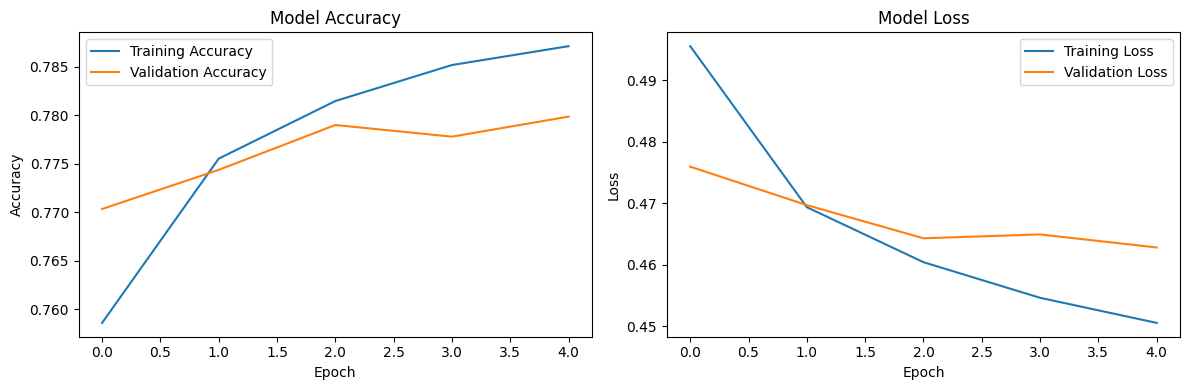

In [30]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary', pos_label=1)  # For Positive class
recall = recall_score(y_test, y_pred, average='binary', pos_label=1)
f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Positive class): {precision:.4f}")
print(f"Recall (Positive class): {recall:.4f}")
print(f"F1-Score (Positive class): {f1:.4f}")

Accuracy: 0.7798
Precision (Positive class): 0.7749
Recall (Positive class): 0.7908
F1-Score (Positive class): 0.7828


In [32]:
# Display sample predictions
"""
This function will get 5 random tweets from my data set and try to predict its sentiment.
"""
num_samples = 5  # Number of samples to display
sample_indices = np.random.choice(len(X_test), num_samples, replace=False)  # Random indices

print("\nSample Predictions:")
print("-" * 80)
for idx in sample_indices:
    tweet = new_df.iloc[X_test[idx]]['Cleaned_tweet']  # Adjust index based on my DataFrame
    actual_label = y_test[idx]
    predicted_label = y_pred[idx][0]  
    probability = y_pred_prob[idx][0]  # Probability of Positive class
    print(f"Tweet: {tweet}")
    print(f"Actual Label: {'Positive' if actual_label == 1 else 'Negative'}")
    print(f"Predicted Label: {'Positive' if predicted_label == 1 else 'Negative'}")
    print(f"Prediction Probability (Positive): {probability:.4f}")
    print("-" * 80)


Sample Predictions:
--------------------------------------------------------------------------------
Tweet: 261                  help me forget 8th april amp 13th july
180243                          mcpukes what happened to DQ
0         is upset that he cant update his Facebook by t...
0         is upset that he cant update his Facebook by t...
0         is upset that he cant update his Facebook by t...
0         is upset that he cant update his Facebook by t...
0         is upset that he cant update his Facebook by t...
0         is upset that he cant update his Facebook by t...
0         is upset that he cant update his Facebook by t...
0         is upset that he cant update his Facebook by t...
0         is upset that he cant update his Facebook by t...
0         is upset that he cant update his Facebook by t...
0         is upset that he cant update his Facebook by t...
Name: Cleaned_tweet, dtype: object
Actual Label: Negative
Predicted Label: Positive
Prediction Probability (Pos